## **QnA from `vector-db`**

In [1]:
from langchain.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader("financial-data/Consolidated_Financial_Statements.pdf")
data = loader.load()

In [2]:
len(data)

4

In [3]:
print(data[0].page_content)

Apple Inc.
CONDENSED CONSOLIDATED STATEMENTS OF OPERATIONS (Unaudited)
(In millions, except number of shares, which are reflected in thousands, and per-share amounts)
Three Months Ended Twelve Months Ended
September 28, September 30, September 28, September 30,
2024 2023 2024 2023
Net sales:
Products $ 69,958 $ 67,184 $ 294,866 $ 298,085
Services 24,972 22,314 96 ,169 85,200
Total net sales (1) 94,930 89,498 391,035 383,285
Cost of sales:
Products 44,566 42,586 185,233 189,282
Services 6,485 6,485 25,119 24,855
Total cost of sales 51,051 49,071 210,352 214,137
Gross margin 43,879 40,427 180,683 169,148
Operating expenses:
Research and development 7,765 7,307 31,370 29,915
Selling, general and administrative 6,523 6,151 26,097 24,932
Total operating expenses 14,288 13,458 57,467 54,847
Operating income 29,591 26,969 123,216 114,301
Other income/(expense), net 19 29 269 (565)
Income before provision for income taxes 29,610 26,998 123,485 113,736
Provision for income taxes 14,874 4,042 29

## **Chunking Documents**

In [4]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 300
)

In [5]:
all_chunks = splitter.split_documents(documents=data)
len(all_chunks)

12

In [6]:
print(all_chunks[0].page_content)

Apple Inc.
CONDENSED CONSOLIDATED STATEMENTS OF OPERATIONS (Unaudited)
(In millions, except number of shares, which are reflected in thousands, and per-share amounts)
Three Months Ended Twelve Months Ended
September 28, September 30, September 28, September 30,
2024 2023 2024 2023
Net sales:
Products $ 69,958 $ 67,184 $ 294,866 $ 298,085
Services 24,972 22,314 96 ,169 85,200
Total net sales (1) 94,930 89,498 391,035 383,285
Cost of sales:
Products 44,566 42,586 185,233 189,282
Services 6,485 6,485 25,119 24,855
Total cost of sales 51,051 49,071 210,352 214,137
Gross margin 43,879 40,427 180,683 169,148
Operating expenses:
Research and development 7,765 7,307 31,370 29,915
Selling, general and administrative 6,523 6,151 26,097 24,932
Total operating expenses 14,288 13,458 57,467 54,847
Operating income 29,591 26,969 123,216 114,301
Other income/(expense), net 19 29 269 (565)
Income before provision for income taxes 29,610 26,998 123,485 113,736


In [7]:
print(all_chunks[1].page_content)

Selling, general and administrative 6,523 6,151 26,097 24,932
Total operating expenses 14,288 13,458 57,467 54,847
Operating income 29,591 26,969 123,216 114,301
Other income/(expense), net 19 29 269 (565)
Income before provision for income taxes 29,610 26,998 123,485 113,736
Provision for income taxes 14,874 4,042 29,749 16,741
Net income $ 14,736 $ 22,956 $ 93,736 $ 96,995
Earnings per share:
Basic $ 0.97 $ 1.47 $ 6.11 $ 6.16
Diluted $ 0.97 $ 1.46 $ 6.08 $ 6.13
Shares used in computing earnings per share:
Basic 15,171,990 15,599,434 15,343,783 15,744,231
Diluted 15,242,853 15,672,400 15,408,095 15,812,547
(1) Net sales by reportable segment:
Americas $ 41,664 $ 40,115 $ 167,045 $ 162,560
Europe 24,924 22,463 101,328 94,294
Greater China 15,033 15,084 66,952 72,559
Japan 5,926 5,505 25,052 24,257
Rest of Asia Pacific 7,383 6,331 30,658 29,615
Total net sales $ 94,930 $ 89,498 $ 391,035 $ 383,285
(1) Net sales by category:
iPhone $ 46,222 $ 43,805 $ 201,183 $ 200,583


### All Chunks are properly Overlap.

# ***Download the HuggingFace Embedding Model***

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
from langchain_huggingface import HuggingFaceEmbeddings
load_dotenv()


os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

## **Accessing `Ollama-Local` Model**

In [10]:
from langchain_community.chat_models import ChatOllama

local_model = ChatOllama(model="gemma3:1b")
local_model.invoke("hi, sir how are you?")

AIMessage(content="Hi there! I'm doing well, thank you for asking. As an AI, I don't really *feel* in the same way humans do, but I’m operating smoothly and ready to help with whatever you need. \n\nHow about you? How’s your day going so far?", additional_kwargs={}, response_metadata={'model': 'gemma3:1b', 'created_at': '2025-07-10T15:49:10.4619517Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 3418733200, 'load_duration': 2385809000, 'prompt_eval_count': 16, 'prompt_eval_duration': 438153900, 'eval_count': 64, 'eval_duration': 573325100}, id='run--fde4bbf5-ab4e-4206-b1f6-60cf5d0bc0b2-0')

## **Use `Pinecone` Cloud db**

In [11]:
from pinecone import Pinecone
os.environ["PINECONE_API_KEY"] = os.getenv("PINECONE_API_KEY")

pinecone_api_key = os.getenv("PINECONE_API_KEY")

pc = Pinecone(api_key=pinecone_api_key)

In [12]:
from pinecone import ServerlessSpec ## you are not going to mange the server. and its managed by the cloud provider.
## create index
index_name = "owgpt-apple-inc-db"

if not pc.has_index(index_name):
    pc.create_index(
    name=index_name,
    dimension=768,
    metric="dotproduct",
    spec=ServerlessSpec(
        cloud="aws",
        region="us-east-1"
    )
)

## **Load the db**

In [13]:
from langchain_pinecone import PineconeVectorStore

index = pc.Index(index_name)



vector_store = PineconeVectorStore(index=index, embedding=embeddings)
vector_store

In [14]:
vector_store.add_documents(documents=all_chunks)

['11a217d5-1ecf-45a5-beeb-83ec0553df9f',
 '09b68175-7ff0-49d5-abb1-46d5c727594c',
 'a746a8de-ea76-4977-a671-0345a213f2af',
 '92f3241a-80cb-44e8-ba2a-1e0f27a0af2e',
 '007f9598-dca2-4202-83e4-6cb2ddab0da1',
 '3d86e14e-73e3-4b05-b234-f16125a759e9',
 'ae151382-b570-4283-940d-c7bfb6ea5f2a',
 'edc9c221-ce07-4529-9201-a6f755a8b286',
 'f3e3ad6a-aae1-4ffd-93ef-23f2548f15d4',
 '74ee7fd3-e629-4e71-af14-745ea2a79712',
 'd995bab6-57cb-4c67-a5eb-ff40ea9c9b66',
 '51774a7e-f116-4afa-b42c-1b88aff303a4']

In [15]:
query = "What is the net sales in september 28, 2024"

response = vector_store.similarity_search_with_score(query=query)
response[0]

(Document(id='39f7db72-691f-461c-808a-17e93877f2f3', metadata={'CreationDate': "D:20241031155329Z00'00'", 'Creator': 'Word', 'ModDate': "D:20241031155329Z00'00'", 'Producer': 'macOS Version 15.0 (Build 24A335) Quartz PDFContext', 'Title': '24-10-31 Apple reports fourth quarter results', 'file_path': 'financial-data/Consolidated_Financial_Statements.pdf', 'page': 0.0, 'source': 'financial-data/Consolidated_Financial_Statements.pdf', 'total_pages': 4.0}, page_content='Apple Inc.\nCONDENSED CONSOLIDATED STATEMENTS OF OPERATIONS (Unaudited)\n(In millions, except number of shares, which are reflected in thousands, and per-share amounts)\nThree Months Ended Twelve Months Ended\nSeptember 28, September 30, September 28, September 30,\n2024 2023 2024 2023\nNet sales:\nProducts $ 69,958 $ 67,184 $ 294,866 $ 298,085\nServices 24,972 22,314 96 ,169 85,200\nTotal net sales (1) 94,930 89,498 391,035 383,285\nCost of sales:\nProducts 44,566 42,586 185,233 189,282\nServices 6,485 6,485 25,119 24,855\

## **Create Retriever**

In [16]:
retriever = vector_store.as_retriever(
    search_type = "similarity",
    search_kwargs={
        "k": 3
    }
)

In [17]:
response = retriever.invoke("What was Apple's total net sales for the year 2024?")
response

[Document(id='39f7db72-691f-461c-808a-17e93877f2f3', metadata={'CreationDate': "D:20241031155329Z00'00'", 'Creator': 'Word', 'ModDate': "D:20241031155329Z00'00'", 'Producer': 'macOS Version 15.0 (Build 24A335) Quartz PDFContext', 'Title': '24-10-31 Apple reports fourth quarter results', 'file_path': 'financial-data/Consolidated_Financial_Statements.pdf', 'page': 0.0, 'source': 'financial-data/Consolidated_Financial_Statements.pdf', 'total_pages': 4.0}, page_content='Apple Inc.\nCONDENSED CONSOLIDATED STATEMENTS OF OPERATIONS (Unaudited)\n(In millions, except number of shares, which are reflected in thousands, and per-share amounts)\nThree Months Ended Twelve Months Ended\nSeptember 28, September 30, September 28, September 30,\n2024 2023 2024 2023\nNet sales:\nProducts $ 69,958 $ 67,184 $ 294,866 $ 298,085\nServices 24,972 22,314 96 ,169 85,200\nTotal net sales (1) 94,930 89,498 391,035 383,285\nCost of sales:\nProducts 44,566 42,586 185,233 189,282\nServices 6,485 6,485 25,119 24,855\

## **Define the `RAG` Prompt**

In [18]:
from langchain_core.prompts import PromptTemplate

rag_prompt = PromptTemplate(
    template="""
You are a financial analyst AI assistant with deep understanding of corporate financial statements.

Your task is to:
- Answer the user's question using **only the given context**.
- Respond with **clear, factual, and concise** answers based on the data provided.
- Do **not guess or fabricate information**.
- If the answer is not explicitly found in the context, respond with:
**"Sorry, the document does not contain information relevant to your question."**

📌 **User Question:**  
{question}

📄 **Document Context (from a financial PDF):**  
{context}

✍️ **Your Answer:**  
""",
    input_variables=["question", "context"]
)


## **Formatted the context data**

In [19]:
def format_docs(retriever_docs):
    context_text = "\n\n".join(doc.page_content for doc in retriever_docs)
    return context_text

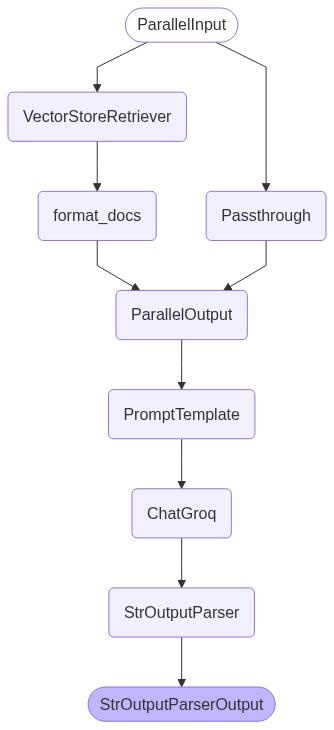

In [28]:

from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

from IPython.display import display, Image
rag_chain = (
    {
        "context": retriever | format_docs,
        "question": RunnablePassthrough()
    }
    | rag_prompt
    | llm
    | StrOutputParser()
)


display(Image(rag_chain.get_graph().draw_mermaid_png()))

In [29]:
question = "What was Apple's total net sales for the year 2024?"
response = rag_chain.invoke(question)
print(response)

Apple's total net sales for the year 2024 was $391,035 million.


In [30]:
question = "Compare Apple's services revenue between 2023 and 2024."

response = rag_chain.invoke(question)
print(response)

Apple's services revenue for 2023 was $85,200 million, and for 2024, it was $96,169 million. 

Comparing the two years, Apple's services revenue increased by $10,969 million ($96,169 - $85,200) from 2023 to 2024.
